# 자살률데이터 시각화

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings    # warnings : 버전 충돌 및 특정 예외 처리를 위해 불러온 내장 모듈
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv("suicide.csv")
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


Data Dictionary


In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [5]:
df.sample(30)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
9431,France,2013,female,15-24 years,116,3728182,3.11,France2013,0.887,"2,811,077,725,704",46922,Millenials
13923,Kazakhstan,2005,female,15-24 years,153,1464554,10.45,Kazakhstan2005,0.746,"57,123,671,734",4096,Millenials
18389,Panama,2001,female,15-24 years,9,284647,3.16,Panama2001,NaN,"12,502,013,400",4558,Millenials
18970,Philippines,2001,male,5-14 years,12,9985839,0.12,Philippines2001,NaN,"76,262,072,468",1109,Millenials
8229,El Salvador,2004,female,35-54 years,20,652329,3.07,El Salvador2004,NaN,"13,724,810,900",2573,Boomers
1689,Australia,2007,female,5-14 years,4,1337384,0.30,Australia2007,NaN,"851,962,785,585",43171,Generation Z
19091,Poland,1991,female,5-14 years,8,3240000,0.25,Poland1991,NaN,"85,500,935,935",2416,Millenials
4357,Brazil,2000,female,75+ years,45,1750820,2.57,Brazil2000,0.683,"655,420,645,477",4156,G.I. Generation
23642,Spain,1994,female,55-74 years,286,4103900,6.97,Spain1994,NaN,"529,121,577,320",14223,Silent
25606,Trinidad and Tobago,2009,female,15-24 years,5,113362,4.41,Trinidad and Tobago2009,NaN,"19,175,196,446",15652,Millenials


In [6]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [7]:
df.groupby('age').head(1)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [8]:
df.groupby('age').describe()

year                                                         \
              count         mean       std     min     25%     50%     75%   
age                                                                          
15-24 years  4642.0  2001.275312  8.479669  1985.0  1995.0  2002.0  2008.0   
25-34 years  4642.0  2001.275312  8.479669  1985.0  1995.0  2002.0  2008.0   
35-54 years  4642.0  2001.275312  8.479669  1985.0  1995.0  2002.0  2008.0   
5-14 years   4610.0  2001.173102  8.419515  1985.0  1994.0  2002.0  2008.0   
55-74 years  4642.0  2001.275312  8.479669  1985.0  1995.0  2002.0  2008.0   
75+ years    4642.0  2001.275312  8.479669  1985.0  1995.0  2002.0  2008.0   

                    suicides_no              ... HDI for year         \
                max       count        mean  ...          75%    max   
age                                          ...                       
15-24 years  2016.0      4642.0  174.179664  ...        0.855  0.944   
25-34 years  2016.0      4642.0  242.118053  ...        0.855  0.944   
35-54 years  2016.0      4642.0  528.250969  ...        0.855  0.944   
5-14 years   2015.0      4610.0   11.337093  ...        0.855  0.944   
55-74 years  2016.0      4642.0  357.269065  ...        0.855  0.944   
75+ years    2016.0      4642.0  140.697544  ...        0.855  0.944   

            gdp_per_capita ($)                                            \
                         count         mean           std    min     25%   
age                                                                        
15-24 years             4642.0  16876.57346  18894.414357  251.0  3450.0   
25-34 years             4642.0  16876.57346  18894.414357  251.0  3450.0   
35-54 years             4642.0  16876.57346  18894.414357  251.0  3450.0   
5-14 years              4610.0  16815.56833  18863.290560  251.0  3436.0   
55-74 years             4642.0  16876.57346  18894.414357  251.0  3450.0   
75+ years               4642.0  16876.57346  18894.414357  251.0  3450.0   

                                        
                50%      75%       max  
age                                     
15-24 years  9378.0  24874.0  126352.0  
25-34 years  9378.0  24874.0  126352.0  
35-54 years  9378.0  24874.0  126352.0  
5-14 years   9283.0  24796.0  126352.0  
55-74 years  9378.0  24874.0  126352.0  
75+ years    9378.0  24874.0  126352.0  

[6 rows x 48 columns]

In [9]:
df.groupby(['age', 'sex']).head(1) #6*2 12그룹

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [10]:
df['age'].value_counts() #어떤나이대에 자살을 많이 할까?

15-24 years    4642
35-54 years    4642
75+ years      4642
55-74 years    4642
25-34 years    4642
5-14 years     4610
Name: age, dtype: int64

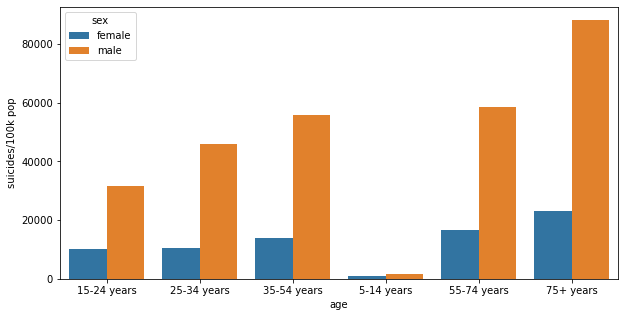

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 나이대별로 자살률 // 어떤나이대에 자살을 많이 할까?
plt.figure(figsize=(10, 5))
sns.barplot(x="age", y="suicides/100k pop", hue="sex", data=df.groupby(['age', 'sex']).sum().reset_index())
plt.show()

In [12]:
df.groupby(['age', 'sex']).sum()

year  suicides_no  population  suicides/100k pop  \
age         sex                                                           
15-24 years female  4644960       175437  4245159089           10045.33   
            male    4644960       633105  4397787807           31487.36   
25-34 years female  4644960       208823  4190523226           10614.42   
            male    4644960       915089  4247580361           45957.10   
35-54 years female  4644960       506233  7266872023           13732.15   
            male    4644960      1945908  7109016100           55653.87   
5-14 years  female  4612704        16997  4107939076            1065.49   
            male    4612704        35267  4290754161            1792.90   
55-74 years female  4644960       430036  4756740046           16533.52   
            male    4644960      1228407  4046505294           58460.68   
75+ years   female  4644960       221984  1705548397           23023.86   
            male    4644960       431134   957732856           88177.15   

                    HDI for year  gdp_per_capita ($)  
age         sex                                       
15-24 years female       541.291            39170527  
            male         541.291            39170527  
25-34 years female       541.291            39170527  
            male         541.291            39170527  
35-54 years female       541.291            39170527  
            male         541.291            39170527  
5-14 years  female       541.291            38759885  
            male         541.291            38759885  
55-74 years female       541.291            39170527  
            male         541.291            39170527  
75+ years   female       541.291            39170527  
            male         541.291            39170527

나라별 자살률

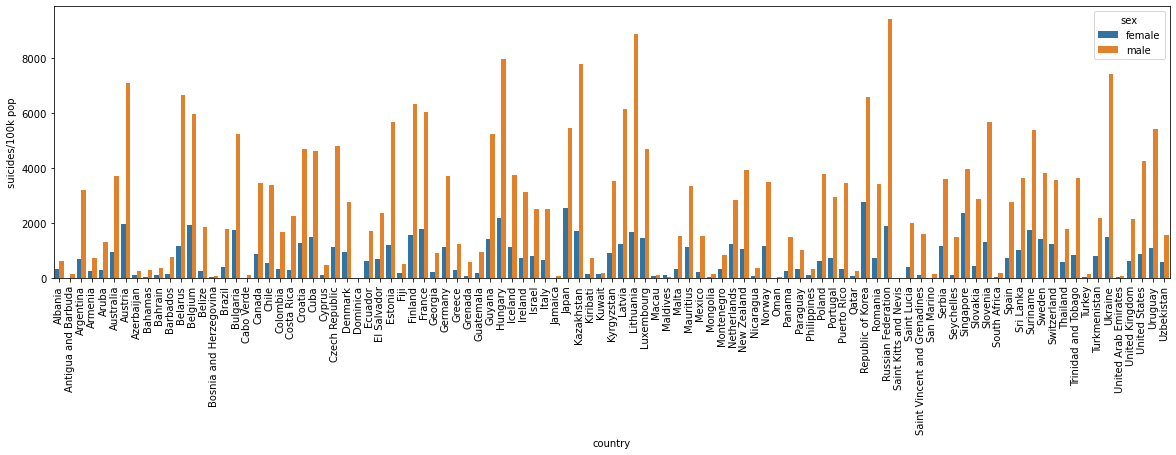

In [13]:
# 나라별 자살률 // 어떤나라에서 자살을 많이 할까?
plt.figure(figsize=(20, 5))
sns.barplot(x="country", y="suicides/100k pop", hue="sex", data=df.groupby(['country', 'sex']).sum().reset_index())
plt.xticks(rotation=90)
plt.show()

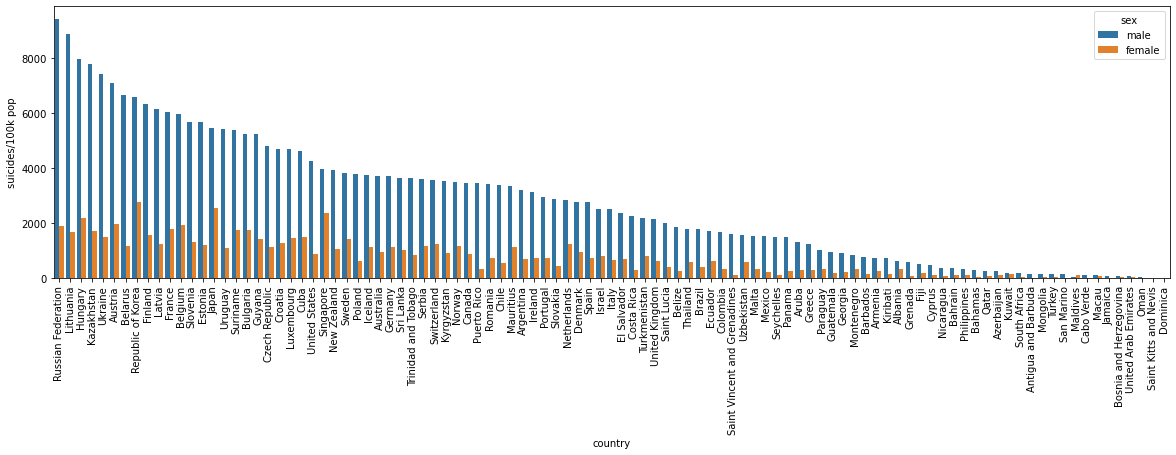

In [14]:
plt.figure(figsize=(20, 5))
sns.barplot(x="country", y="suicides/100k pop", hue="sex", data=df.groupby(['country', 'sex']).sum().reset_index().sort_values("suicides/100k pop", ascending=False))
plt.xticks(rotation=90)
plt.show()

In [15]:
df.groupby(['country', 'sex']).sum().reset_index().sort_values("suicides/100k pop", ascending=False).head(20)

,country,sex,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
151,Russian Federation,male,324324,995412,1710091647,9425.76,0.000,1056048
105,Lithuania,male,262710,23028,31473618,8902.36,38.568,1215752
81,Hungary,male,310530,55776,117934972,7970.00,38.586,1452358
95,Kazakhstan,male,312390,83386,181256041,7802.19,40.008,831342
191,Ukraine,male,336096,258573,591598875,7434.57,34.248,313746
13,Austria,male,382080,36878,117539586,7104.58,50.850,6544000
23,Belarus,male,252138,49890,91729737,6647.46,23.136,420072
147,Republic of Korea,male,372000,179115,677995723,6595.32,0.000,2753034
65,Finland,male,348174,26017,69115399,6341.53,46.380,6171480
103,Latvia,male,252630,10296,20509370,6145.76,37.644,1129098


In [16]:
country_suicides = df.groupby("country").sum().reset_index()

In [17]:
country_suicides

,country,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,Albania,527796,1970,62325467,924.76,32.304,490788
1,Antigua and Barbuda,647832,11,1990228,179.14,28.140,3385212
2,Argentina,744000,82219,1035985431,3894.59,93.552,2944044
3,Armenia,596832,1905,77348173,976.21,66.252,558428
4,Aruba,336720,101,1259677,1596.52,0.000,4069236
...,...,...,...,...,...,...,...
96,United Arab Emirates,144540,622,36502275,94.89,19.800,3035664
97,United Kingdom,744000,136805,1738767780,2790.92,103.620,11869908
98,United States,744000,1034013,8054027201,5140.97,106.992,14608296
99,Uruguay,672072,13138,84068943,6538.96,80.628,2561016


In [18]:
country_suicides.sort_values(by="suicides/100k pop", ascending=False)

,country,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
75,Russian Federation,648648,1209742,3690802620,11305.13,0.000,2112096
52,Lithuania,525420,28039,68085210,10588.88,77.136,2431504
40,Hungary,621060,73891,248644256,10156.07,77.172,2904716
47,Kazakhstan,624780,101546,377513869,9519.52,80.016,1662684
73,Republic of Korea,744000,261730,1354944936,9350.45,0.000,5506068
...,...,...,...,...,...,...,...
45,Jamaica,407604,184,39481817,106.44,50.448,673452
96,United Arab Emirates,144540,622,36502275,94.89,19.800,3035664
65,Oman,72396,33,8987087,26.50,19.056,746664
76,Saint Kitts and Nevis,71676,0,117300,0.00,0.000,198900


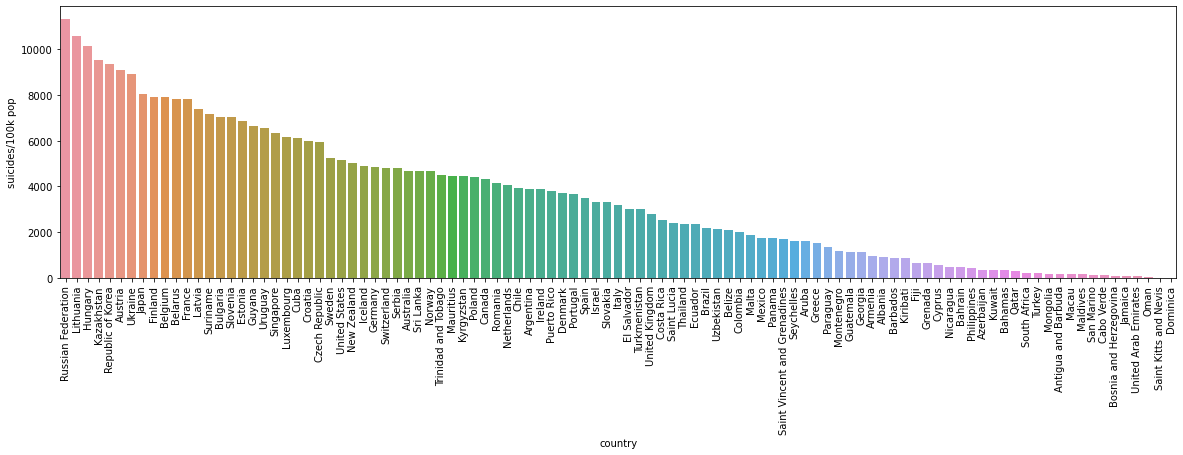

In [19]:
plt.figure(figsize=(20, 5))
sns.barplot(x="country", y="suicides/100k pop", data=country_suicides.sort_values(by="suicides/100k pop", ascending=False))
plt.xticks(rotation=90)
plt.show()

In [20]:
country_suicides.sort_values(by="suicides/100k pop", ascending=False)[:10]

,country,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
75,Russian Federation,648648,1209742,3690802620,11305.13,0.000,2112096
52,Lithuania,525420,28039,68085210,10588.88,77.136,2431504
40,Hungary,621060,73891,248644256,10156.07,77.172,2904716
47,Kazakhstan,624780,101546,377513869,9519.52,80.016,1662684
73,Republic of Korea,744000,261730,1354944936,9350.45,0.000,5506068
6,Austria,764160,50073,243853094,9076.23,101.700,13088000
95,Ukraine,672192,319950,1286469184,8931.66,68.496,627492
46,Japan,744000,806902,3681024844,8025.23,103.356,13539888
32,Finland,696348,33677,141925658,7924.11,92.760,12342960
12,Belgium,744000,62761,303302621,7900.50,103.284,11928828


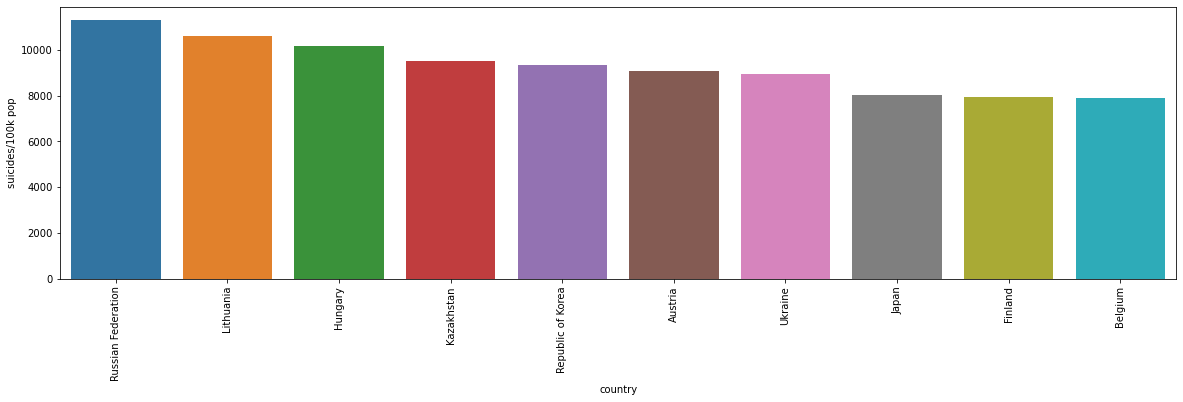

In [21]:
plt.figure(figsize=(20, 5))
sns.barplot(x="country", y="suicides/100k pop", data=country_suicides.sort_values(by="suicides/100k pop", ascending=False)[:10])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='year', ylabel='Density'>

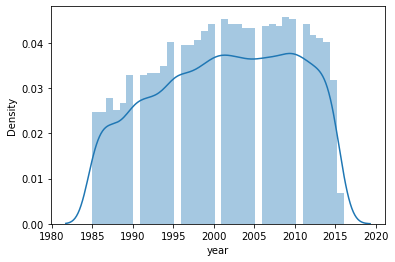

In [22]:
sns.distplot(df['year'])

In [23]:
df['year'].value_counts(ascending=True)

2016     160
1985     576
1986     576
1988     588
1989     624
1987     648
2015     744
1991     768
1990     768
1993     780
1992     780
1994     816
1997     924
1996     924
1995     936
2014     936
1998     948
2013     960
2012     972
1999     996
2004    1008
2005    1008
2008    1020
2006    1020
2000    1032
2003    1032
2002    1032
2011    1032
2007    1032
2010    1056
2001    1056
2009    1068
Name: year, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, '1985'),
  Text(1, 0, '1986'),
  Text(2, 0, '1987'),
  Text(3, 0, '1988'),
  Text(4, 0, '1989'),
  Text(5, 0, '1990'),
  Text(6, 0, '1991'),
  Text(7, 0, '1992'),
  Text(8, 0, '1993'),
  Text(9, 0, '1994'),
  Text(10, 0, '1995'),
  Text(11, 0, '1996'),
  Text(12, 0, '1997'),
  Text(13, 0, '1998'),
  Text(14, 0, '1999'),
  Text(15, 0, '2000'),
  Text(16, 0, '2001'),
  Text(17, 0, '2002'),
  Text(18, 0, '2003'),
  Text(19, 0, '2004'),
  Text(20, 0, '2005'),
  Text(21, 0, '2006'),
  Text(22, 0, '2007'),
  Text(23, 0, '2008'),
  Text(24, 0, '2009'),
  Text(25, 0, '2010'),
  Text(26, 0, '2011'),
  Text(27, 0, '2012'),
  Text(28, 0, '2013'),
  Text(29, 0, '2014'),
  Text(30, 0, '2015'),
  Text(31, 0, '2016')])

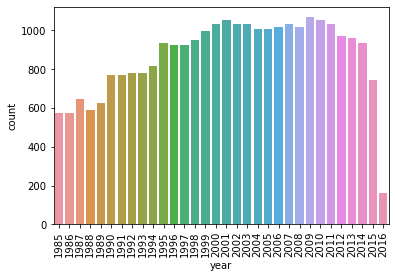

In [24]:
sns.countplot('year', data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, '1985'),
  Text(1, 0, '1986'),
  Text(2, 0, '1987'),
  Text(3, 0, '1988'),
  Text(4, 0, '1989'),
  Text(5, 0, '1990'),
  Text(6, 0, '1991'),
  Text(7, 0, '1992'),
  Text(8, 0, '1993'),
  Text(9, 0, '1994'),
  Text(10, 0, '1995'),
  Text(11, 0, '1996'),
  Text(12, 0, '1997'),
  Text(13, 0, '1998'),
  Text(14, 0, '1999'),
  Text(15, 0, '2000'),
  Text(16, 0, '2001'),
  Text(17, 0, '2002'),
  Text(18, 0, '2003'),
  Text(19, 0, '2004'),
  Text(20, 0, '2005'),
  Text(21, 0, '2006'),
  Text(22, 0, '2007'),
  Text(23, 0, '2008'),
  Text(24, 0, '2009'),
  Text(25, 0, '2010'),
  Text(26, 0, '2011'),
  Text(27, 0, '2012'),
  Text(28, 0, '2013'),
  Text(29, 0, '2014'),
  Text(30, 0, '2015'),
  Text(31, 0, '2016')])

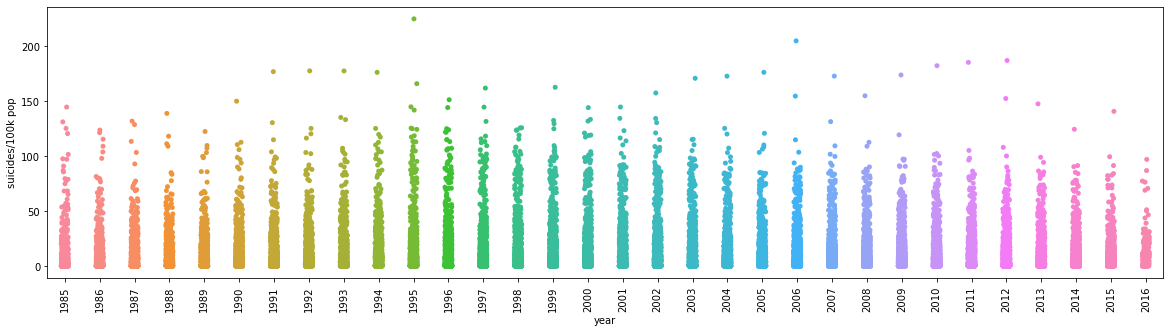

In [25]:
plt.figure(figsize=(20, 5))
sns.stripplot(x='year', y="suicides/100k pop", data=df)
plt.xticks(rotation=90)

In [26]:
df['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [27]:
df['age'].value_counts().sort_index()

15-24 years    4642
25-34 years    4642
35-54 years    4642
5-14 years     4610
55-74 years    4642
75+ years      4642
Name: age, dtype: int64

In [28]:
df['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [29]:
df['generation'].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

<AxesSubplot:xlabel='generation', ylabel='count'>

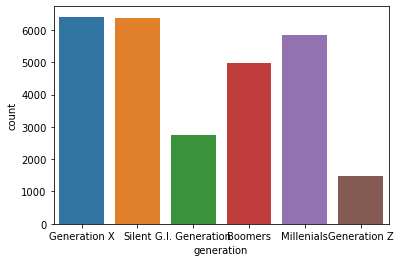

In [30]:
sns.countplot(x='generation', data=df)

<AxesSubplot:ylabel='generation'>

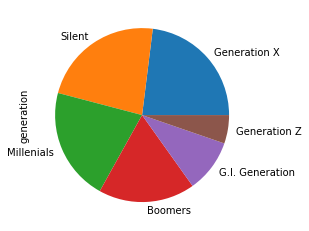

In [31]:
df['generation'].value_counts().plot.pie()

<AxesSubplot:xlabel='year'>

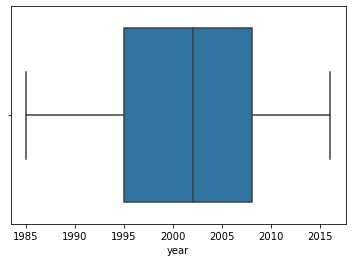

In [32]:
sns.boxplot(df['year'])

<AxesSubplot:>

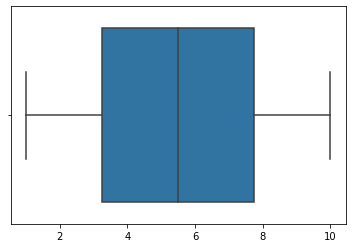

In [33]:
sns.boxplot([num for num in range(1, 11)])

<AxesSubplot:xlabel='suicides/100k pop'>

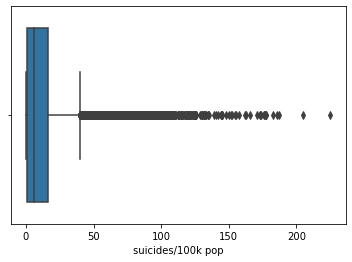

In [34]:
sns.boxplot(df["suicides/100k pop"])
# 0쪽에 많이 몰려 있다.

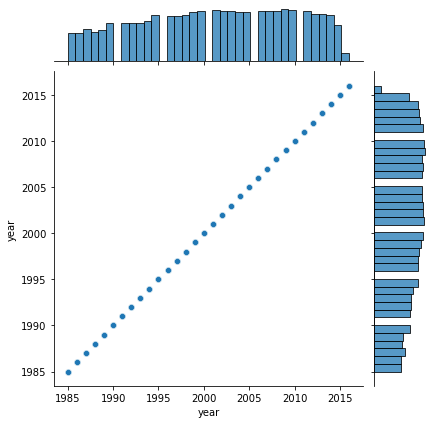

In [35]:
sns.jointplot('year', 'year', data=df)

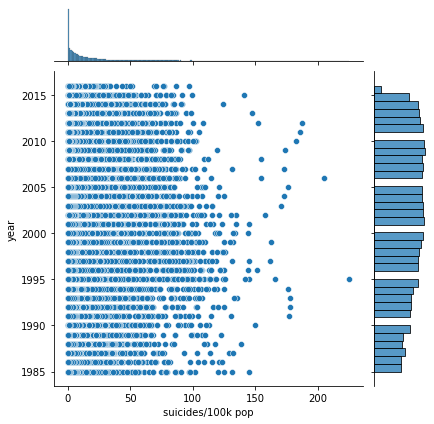

In [36]:
#년도에 따라 자살률변화 추이 
sns.jointplot('suicides/100k pop', 'year', data=df)

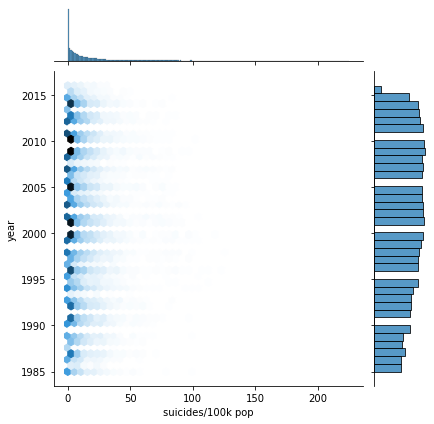

In [37]:
sns.jointplot('suicides/100k pop', 'year', data=df, kind="hex")

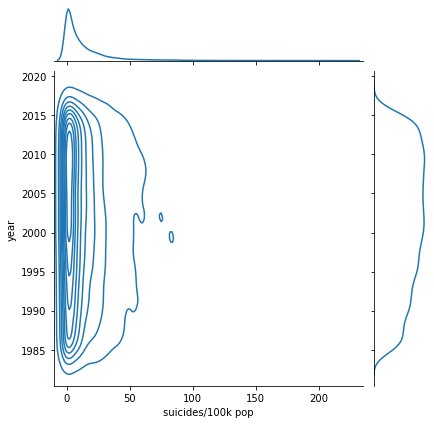

In [38]:
sns.jointplot('suicides/100k pop', 'year', data=df, kind="kde")

In [39]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

<AxesSubplot:xlabel='gdp_per_capita ($)'>

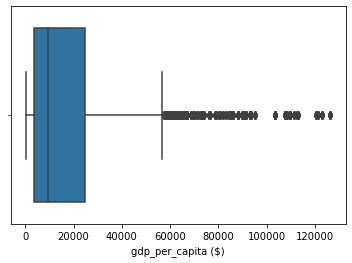

In [40]:
sns.boxplot(df['gdp_per_capita ($)'])

소득과 자살률 관계

<AxesSubplot:xlabel='gdp_per_capita ($)', ylabel='Density'>

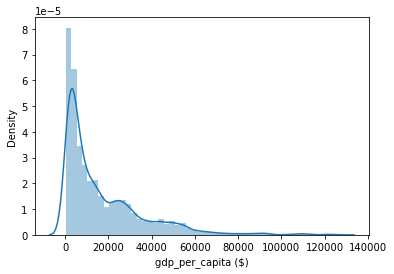

In [42]:
sns.distplot(df['gdp_per_capita ($)'])

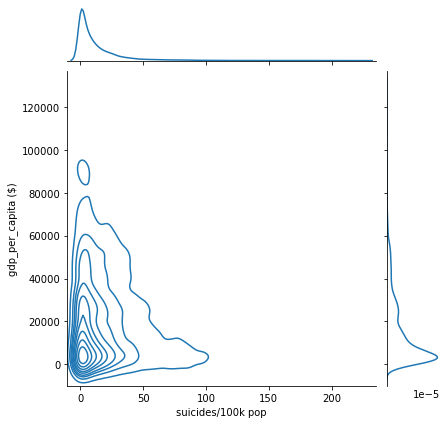

In [43]:
# 소득이 낮을수록 자살률이 높다
sns.jointplot('suicides/100k pop', 'gdp_per_capita ($)', data=df, kind="kde")

References
- https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016